In [1]:
import matplotlib.pyplot as plt
import numpy as np

DIMS = (16, 16)
NF = 2 # number of features / parameters

# random_result = np.random.randn(*DIMS)

# plt.imshow(random_result)
# plt.tight_layout()
# plt.show()

In [2]:
from functions import rastrigin

image = np.zeros(DIMS, dtype=float)

x = np.zeros(2)

i_space = np.linspace(-5.12, 5.12, DIMS[0])
j_space = np.linspace(-5.12, 5.12, DIMS[1])

for i, xi in enumerate(i_space):
    for j, xj in enumerate(j_space):
        x[0], x[1] = xi, xj
        image[i][j] = rastrigin(x)

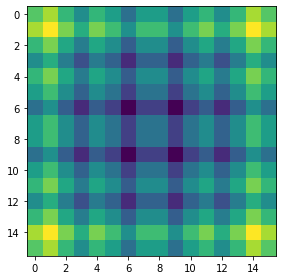

In [3]:
plt.imshow(image)
plt.tight_layout()
plt.show()

In [4]:
def sample_uniform(low, high, shape):
    return np.random.uniform(low, high, shape)


def evaluate(population, f=rastrigin):
    return np.apply_along_axis(f, 2, pop)


def plot_fitness(fitness):
    plt.imshow(fitness)
    plt.tight_layout()
    plt.show()

(16, 16)


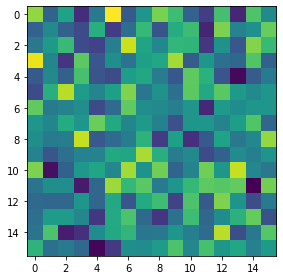

In [5]:
pop = sample_uniform(-5.12, 5.12, DIMS + (NF,))
fit = evaluate(pop)
print(fit.shape)
plot_fitness(fit)

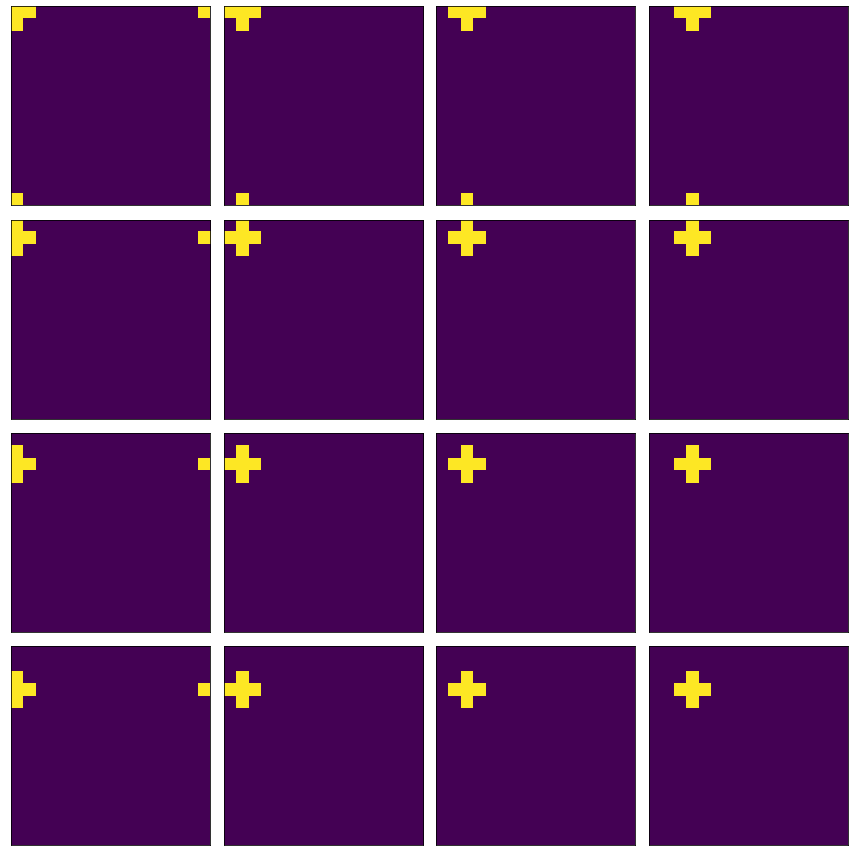

In [6]:
from operators import linear_nhood

def draw_nhood(image, nhood_idx):
    for idx in nhood_idx:
        x, y = idx
        image[x][y] = 1.0


fig, ax = plt.subplots(4, 4, figsize=(12, 12), subplot_kw={"xticks": (), "yticks": ()})

for i in range(4):
    for j in range(4):
        image = np.zeros(DIMS)
        nhood_idx = linear_nhood(i, j, DIMS)
        draw_nhood(image, nhood_idx)
        ax[i][j].imshow(image)
fig.tight_layout()

In [7]:
from operators import get_nhood, select_linear

nhood_idx        = linear_nhood(0, 0, DIMS)
nhood, nhood_fit = get_nhood(pop, fit, nhood_idx)

selected = select_linear(nhood, nhood_fit)

[[-4.15899283 -4.54621203]
 [-1.42251161 -4.00716301]
 [-3.97331463  1.79694773]
 [-1.43973497 -4.24585869]
 [-3.93067726  1.21702685]]
[62.13508597 36.9290185  26.24926648 49.13159808 25.80809603]
